# Phase 2 Milestone 2

## Muhammad Galang Al-Hakim

## HCK-004

# Problem Statement

Pembuatan model deep learning menggunakan dataset Animal-10 untuk mengklasifikasikan gambar berbagai hewan sesuai dengan classnya menggunakan transfer learning ResNet50 untuk mendapatkan akurasi terbaik.

# Import Libraries

Import di awal proyek ini diperlukan untuk memuat dan memanipulasi kumpulan data, membangun model pembelajaran mendalam, dan memvisualisasikan hasilnya. Pustaka ini menyediakan fungsi dan alat untuk prapemrosesan data, arsitektur dan pelatihan model, dan evaluasi hasil. Mereka memengaruhi proyek dengan memungkinkan kami bekerja secara efisien dan efektif dengan kumpulan data dan membangun model berperforma tinggi.

In [40]:
# Import libraries
import os  # For interacting with the file system
import shutil  # For managing files and directories in a cross-platform manner
import keras  # For building deep learning models
import numpy as np  # For numerical operations on arrays
import pandas as pd
from glob import glob  # For finding file paths
from pathlib import Path
!pip install split-folders
import splitfolders

# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator  # For image data augmentation

# Data visualization
import seaborn as sns  # For statistical visualizations
import matplotlib.pyplot as plt  # For creating static plots
import plotly.graph_objects as go

# Model architecture
import glob
import tensorflow as tf
from keras import layers,models
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications import MobileNetV2
from keras import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import load_model  # For loading pre-trained models
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout  # For defining model layers

# Training callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping  # For training callbacks

# Pre-trained models
from tensorflow.keras.applications import ResNet50  # For using pre-trained models

# model saving
import joblib

In [13]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

# Data Loading

Pada bagian ini, saya membuat jalur ke set data Animal-10 dan mendapatkan daftar nama kelas dari set data. Kami kemudian menghitung jumlah kelas dan mencetak nama kelas asli dan jumlah kelas. Informasi ini penting untuk memahami struktur kumpulan data dan menyiapkannya untuk digunakan dalam model pembelajaran mendalam.

In [14]:
# Set the path to the dataset
data_path = r"C:\Users\Galang\Documents\H8\ML\P2M2\archive\raw-img"

# Get a list of class names from the data path
class_names = sorted(os.listdir(data_path))

# Count the number of classes
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


Kode mencetak nama kelas dan jumlah kelas dalam dataset Animal-10. Berdasarkan output, kita dapat mengamati bahwa ada total 10 kelas dalam dataset dan nama kelas dalam bahasa Italia.

Nama kelas ini sesuai dengan berbagai jenis hewan, yang menjadi target model klasifikasi gambar kami. Dengan mengetahui jumlah dan nama kelas, kita dapat lebih memahami struktur dataset dan mempersiapkannya untuk pelatihan model deep learning.

---

Pada bagian ini dataset yang berupa data gambar dengan format (png, jpeg dan jpg) diubah menjadi bentuk dataframe menggunakan pandas untuk memudahkan saat melakukan pelatihan model deep learning.

In [15]:
image_dir = Path(data_path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

---

# Exploration Data Analysis (EDA)

Dengan memperoleh jumlah sampel di setiap kelas, kita dapat menghitung distribusi kelas dan menentukan apakah dataset seimbang atau tidak seimbang.

Informasi ini dapat digunakan untuk menentukan apakah ada langkah tambahan, seperti augmentasi data atau pembobotan kelas, yang diperlukan untuk menyeimbangkan kumpulan data dan meningkatkan kinerja model pembelajaran mendalam.

In [16]:
# Get the number of samples in each class
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)

# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


Kode mencetak daftar bilangan bulat, yang sesuai dengan jumlah sampel di setiap kelas dataset Animal-10. Berdasarkan output tersebut, dapat kita lihat bahwa distribusi kelas tidak berimbang, karena jumlah sampel pada setiap kelas sangat bervariasi. Kelas terkecil, “elefante”, hanya memiliki 1446 sampel, sedangkan kelas terbesar, “cane”, memiliki 4863 sampel.

Ketidakseimbangan ini berpotensi memengaruhi kinerja model pembelajaran mendalam yang dilatih pada kumpulan data ini, karena model tersebut mungkin bias terhadap kelas mayoritas dan memiliki akurasi yang lebih rendah pada kelas minoritas. Oleh karena itu, mungkin perlu menggunakan teknik seperti augmentasi data atau pembobotan kelas untuk menyeimbangkan kumpulan data dan meningkatkan kinerja model.

---

In [17]:
# to convert lists to dictionary
class_name_size = dict(zip(class_names, class_sizes))
class_name_size

{'cane': 4863,
 'cavallo': 2623,
 'elefante': 1446,
 'farfalla': 2112,
 'gallina': 3098,
 'gatto': 1668,
 'mucca': 1866,
 'pecora': 1820,
 'ragno': 4821,
 'scoiattolo': 1862}

---

Kode di bawah memberikan representasi visual dari distribusi kelas dataset Animal-10 menggunakan diagram lingkaran, yang dapat membantu kita untuk lebih memahami dataset dan mengidentifikasi ketidakseimbangan.

In [43]:
# Define the data
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

Grafik batang selanjutnya memberikan representasi visual dari distribusi jumlah gambar di setiap kelas kumpulan data Animal-10, yang dapat membantu kita untuk lebih memahami kumpulan data dan mengidentifikasi ketidakseimbangan apa pun.

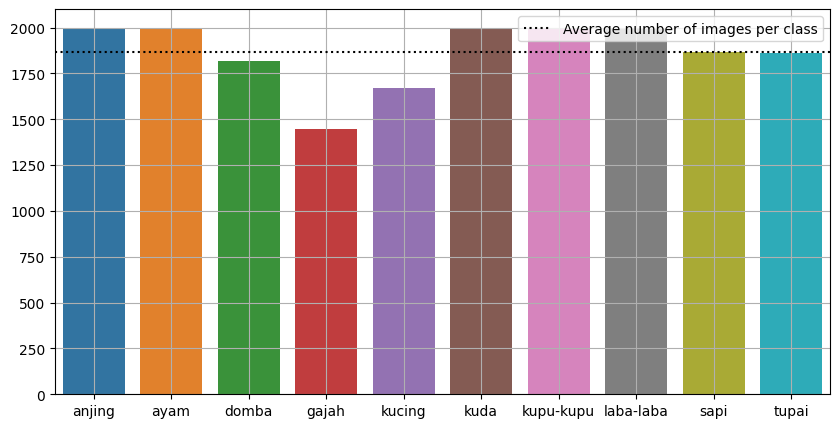

In [44]:
# Plot a bar graph of the number of images in each class

# Set the size of the figure
plt.figure(figsize=(10,5))

# Plot a bar chart using the class names as the x-axis and class sizes as the y-axis
sns.barplot(x=class_names, y=class_sizes)

# Add a grid to the plot
plt.grid()

# Add a horizontal line to show the mean number of images across all classes
plt.axhline(np.mean(class_sizes), color='black', linestyle=':', label="Average number of images per class")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Feature Engineering

### Pembuatan Sampel dan Direktori Data Sampel

Pada kode di bawah ini, kami membuat kumpulan data yang lebih kecil dan lebih mudah dikelola untuk melatih dan menguji model pembelajaran mesin dan juga memetakan nama Italia ke nama Indonesia untuk membuat konvensi penamaan yang lebih mudah dipahami untuk kelas dalam kumpulan data.

In [18]:
# Set the path to the directory where the sampled data will be saved
data_sample_path = "C:/Users/Galang/Documents/H8/ML/P2M2/data_sampel"

# Set the percentage of each class to sample
sample_percent = 0.1

# Define a dictionary that maps the original class names to their English names
class_names_dict = {
    'cane': 'anjing',
    'cavallo': 'kuda',
    'elefante': 'gajah',
    'farfalla': 'kupu-kupu',
    'gallina': 'ayam',
    'gatto': 'kucing',
    'mucca': 'sapi',
    'pecora': 'domba',
    'ragno': 'laba-laba',
    'scoiattolo': 'tupai'
}

# Loop through each class directory and copy 2000 images or less to the sampled data directory
for class_name in os.listdir(data_path):
    # Get the path to the original class directory
    class_path = os.path.join(data_path, class_name)
    # Get the English name of the class
    class_name_en = class_names_dict[class_name]
    # Get the path to the sampled class directory
    sampled_class_path = os.path.join(data_sample_path, class_name_en)
    # Create the sampled class directory and fill it up only if it doesn't exist ********
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
        # Get a list of all the image files in the class directory
        image_files = os.listdir(class_path)
        # Calculate the number of images to sample **************
        image_class_size = class_name_size[class_name]
        if image_class_size > 1400:
            num_images = 1400
        else:
            num_images = int(image_class_size)
        # Sample the images
        sampled_images = np.random.choice(image_files, size=num_images, replace=False)
        # Copy the sampled images to the sampled class directory
        for image_name in sampled_images:
            src_path = os.path.join(class_path, image_name)
            dst_path = os.path.join(sampled_class_path, image_name)
            shutil.copyfile(src_path, dst_path)

Pada bagian ini juga menganalisis distribusi kelas dari kumpulan data sampel kami dengan terlebih dahulu mendapatkan daftar nama kelas dan jumlah sampel di setiap kelas dari direktori data sampel.

---

Visualisasi ini memudahkan untuk mengidentifikasi dengan cepat kelas mana yang memiliki lebih banyak atau lebih sedikit sampel, dan dapat membantu kami mengidentifikasi potensi masalah ketidakseimbangan kelas yang mungkin perlu ditangani selama pelatihan model.

In [19]:
# Get a list of class names from the sampled data directory
class_names = sorted(os.listdir(data_sample_path))

# Get the number of samples in each class
class_sizes = []
for name in class_names:
    # Get the number of samples in the class directory
    class_size = len(os.listdir(os.path.join(data_sample_path, name)))
    class_sizes.append(class_size)

# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [2000, 2000, 1820, 1446, 1668, 2000, 2000, 2000, 1866, 1862]


---

Membuat folder data sampel yang terdiri dari masing-masing folder train, validation dan test

In [22]:
splitfolders.ratio(data_sample_path, output=r"C:\Users\Galang\Documents\H8\ML\P2M2\data__split", seed=101, ratio=(.8, .1, .1))

In [25]:
train_path=r"C:\Users\Galang\Documents\H8\ML\P2M2\data__split\train"
val_path=r"C:\Users\Galang\Documents\H8\ML\P2M2\data__split\val"
test_path=r"C:\Users\Galang\Documents\H8\ML\P2M2\data__split\test"
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)


Melakukan pembagian dataset untuk data train, data validation dan data test

In [26]:
train_image1 = glob.glob(r'C:\Users\Galang\Documents\H8\ML\P2M2\data__split\train\*\*.jpeg')

Total_TrainImages = train_image1 
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob(r'C:\Users\Galang\Documents\H8\ML\P2M2\data__split\test\*\*.jpeg')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob(r'C:\Users\Galang\Documents\H8\ML\P2M2\data__split\val\*\*.jpeg')

Total_ValImages = Val_image1 
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  13542
Total number of test images:  1694
Total number of val images:  1666


Pada bagian dibawah ini, melakukan visualisasi 16 gambar secara acak

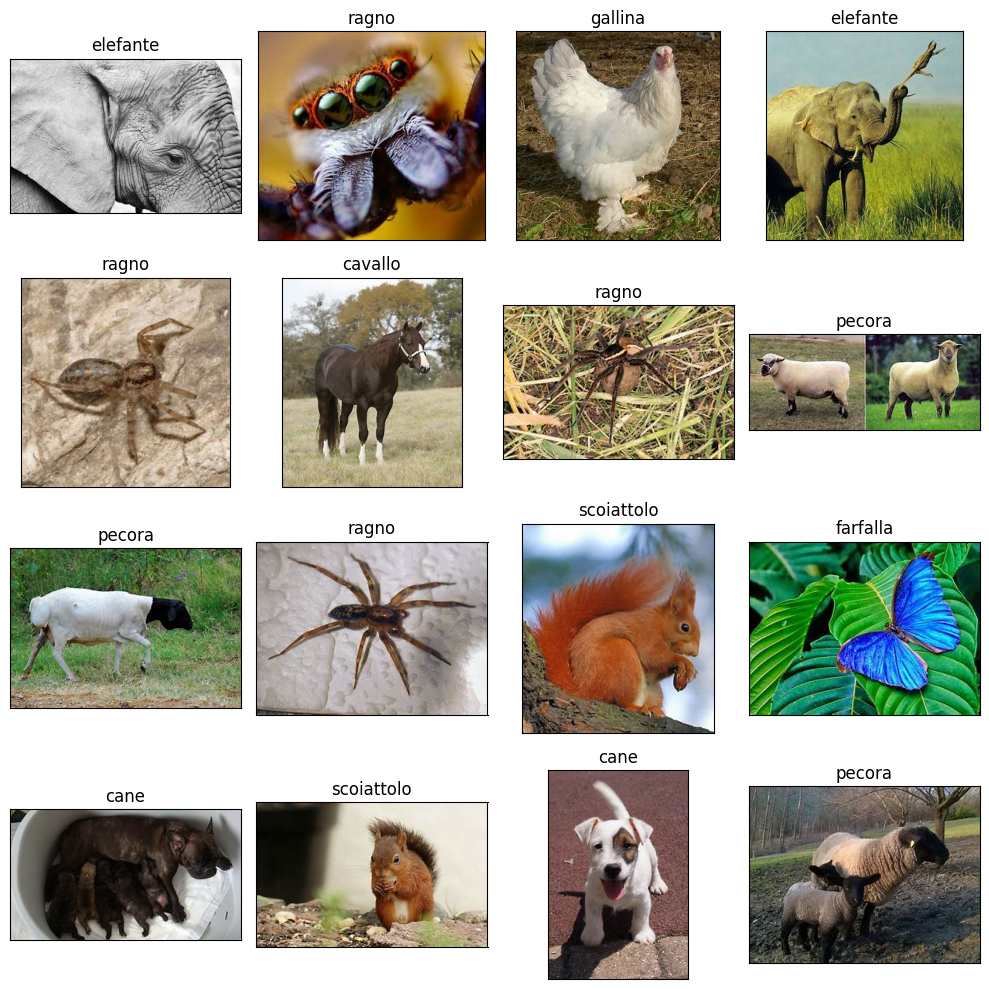

In [39]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# Data Augmentation

In [28]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 14927 images belonging to 10 classes.
Found 1871 images belonging to 10 classes.
Found 1864 images belonging to 10 classes.


# Model Training

In [29]:

model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94765736/94765736 [==============================] - 166s 2us/step


In [30]:
for layers in model.layers:
    layers.trainable = False

In [31]:
y = keras.layers.Flatten()(model.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

model = keras.Model(model.input, y)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [32]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [33]:
History = model.fit_generator(train_generator,validation_data=val_generator,epochs=5,verbose=1)

C:\Users\Galang\AppData\Local\Temp\ipykernel_9432\2791354595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_generator,validation_data=val_generator,epochs=5,verbose=1)


Epoch 1/5
467/467 [==============================] - 688s 1s/step - loss: 4.8390 - accuracy: 0.8096 - val_loss: 3.1907 - val_accuracy: 0.9040
Epoch 2/5
467/467 [==============================] - 671s 1s/step - loss: 4.7672 - accuracy: 0.8702 - val_loss: 4.6642 - val_accuracy: 0.8959
Epoch 3/5
467/467 [==============================] - 671s 1s/step - loss: 4.5749 - accuracy: 0.8917 - val_loss: 4.3017 - val_accuracy: 0.9185
Epoch 4/5
467/467 [==============================] - 675s 1s/step - loss: 4.3893 - accuracy: 0.9037 - val_loss: 5.1971 - val_accuracy: 0.9136
Epoch 5/5
467/467 [==============================] - 675s 1s/step - loss: 4.6605 - accuracy: 0.9072 - val_loss: 5.2506 - val_accuracy: 0.9222


# Model Evaluation

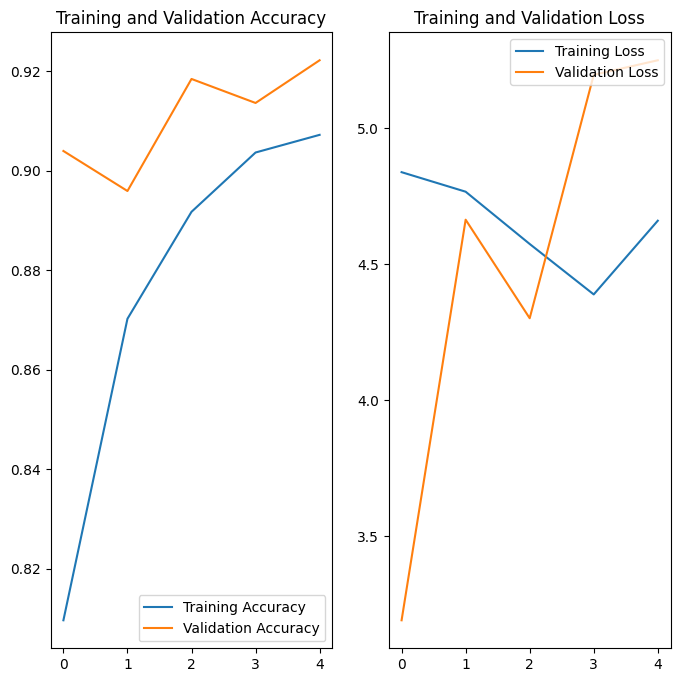

In [34]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
results = model.evaluate(test_generator, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 6.11632
Test Accuracy: 91.02%


# Model Saving

In [41]:
model.save('best_model.h5')
joblib.dump(class_names,'class_names.pkl')

['class_names.pkl']

# Conclusion

# Model Analysis

Model CNN Training menggunakan ResNet50. 

pada ResNet50 didapati bahwa model menggunakan hyperparameter tuning dengan menggunakan beberapa parameter seperti Epoch, Learning rate, Optimizer, dan Activation pada hidden layer serta menambah hidden layer, berhasil meningkatkan akurasi dari model yang sangat signifikan.
didapati nilai yang cukup baik namun overfit.

Setelah dilakukan Hyperparameter Tuning didapatkan model terbaik  dengan nilai akurasi pada data test sebesar 91%, namun Test lossnya lumayan besar 6.11632, hal ini dapat terjadi karena isi dari dataset yang terlalu banyak dan juga dilakukan sample acak untuk digunakan sebagai model training.

# Overall Analysis

 Dapat disimpulkan bahwa dengan model yang telah dibuat yang memiliki nilai akurasi 91% dapat memprediksi gambar hewan sesuai dengan nama classnya.

1. Dapatkan student menjelaskan manfaat dari project yg dibuat terutama untuk bisnis?
2. Dapatkah Student menjelaskan alasan suatu teknik preprocessing termasuk feature engineering  yg dipilih, apakah ada kelebihan dari teknik yg dipilih ? (Jangan hanya mengikuti saja dari sumber yang dibaca.)
3. Dapatkah Student menjelaskan arsitektur yang dirancang, baik dari segi jumlah layer, jumlah neuron, dll . Apakah kelebihan dan kekurang dari model yg di buat dari sisi teori maupun hasil setelah uji coba? Jelaskan juga kenapa gunakan relu, BatchNormalization maupun dropout jika menggunakan parameter tersebut?
4. Apa maksud dari performansi yang didapatkan baik saat training maupun testing ?
5. Dapatkah Student menjelaskan data seperti apa yang akan diprediksi salah oleh model ? (Coba jawab pertanyaan ini untuk tugas Milestone 2 ini)
6. Jika menggunakan transfer learning, mengapa algoritma tersebut yang dipilih ? Apa keistimewaannya ? Darimana landasannya ?
7. Jelaskan juga apakah ada saran untuk di improve pada modelnya? 
8.  Apakah ada saran dalam bisnis apabila diterapkan untuk suatu perusahaan? 


1. Projek ini dapat membantu dalam berbagai bidang bisnis yang berhubungan dengan hewan. Dengan kemampuan untuk mengidentifikasi, memantau, dan menganalisis perilaku hewan, bisnis dapat meningkatkan efisiensi dan efektivitas operasional mereka, serta memperkuat konservasi dan perlindungan hewan.
2. Teknik Data Augmentation adalah teknik preprocessing yang sangat berguna dalam projek deep learning, terutama pada dataset Animal-10. Dengan meningkatkan variasi gambar, memperluas dataset, dan mencegah overfitting, teknik ini dapat membantu meningkatkan akurasi dan kinerja model secara signifikan.
3. Flatten Layer: Digunakan untuk meratakan output dari Convolutional Layers menjadi satu dimensi; Dropout Layer: Digunakan untuk mengurangi overfitting dengan secara acak mengabaikan sebagian kecil neuron saat pelatihan. 
- Beberapa kelebihan dari arsitektur model ini adalah:

- Kemampuan untuk mempelajari fitur yang kompleks dari gambar-gambar pada dataset Animal-10.

- Menggunakan teknik Dropout untuk mengurangi overfitting dan meningkatkan generalisasi model.

- Beberapa kekurangan dari arsitektur model ini adalah:

- Memerlukan waktu dan sumber daya komputasi yang cukup besar untuk melakukan pelatihan model.

- Ketergantungan pada parameter hyperparameter yang optimal untuk mencapai kinerja model yang optimal
4. Performansi training mengacu pada seberapa baik model belajar dari data training. Performansi training yang sangat tinggi menunjukkan bahwa model kita mungkin terlalu rumit dan mempelajari setiap detail pada data training. Ini dapat menyebabkan overfitting, di mana model tidak dapat melakukan generalisasi dengan baik pada data baru yang tidak pernah dilihat sebelumnya. Performansi testing mengacu pada seberapa baik model dapat memprediksi kelas yang tepat untuk data testing. Model yang memiliki performansi testing yang baik menunjukkan kemampuan model dalam melakukan generalisasi pada data yang tidak pernah dilihat sebelumnya.
5. kemungkinan gambar yang kurang jelas mungkin saja terjadi permodelan yang salah.
6. Saya menggunakan ResNet50, keistimewannya adalah Mengatasi masalah vanishing gradient, Efektif untuk training deep neural network, Performa yang tinggi, Arsitektur yang modular, Arsitektur yang ringan.
7. Gunakan datanya lebih sedikit agar dapat mendapatkan hasil loss accuracy yang maximal.
8. Monitoring satwa liar: Proyek ini dapat digunakan untuk memonitor populasi satwa liar dan mendukung upaya konservasi hewan. Dengan teknologi ini, mungkin dapat dilakukan pemantauan hewan secara real-time untuk mengidentifikasi hewan yang membutuhkan perlindungan atau pemulihan habitat.

